### NGUYỄN TRẦN LÂM - 20016701
### *LAB 01 - DEEPLEARNING*

Data link: https://drive.google.com/file/d/1-xM3vbO5D9sO71Ord2ip6UVzevdyhdKs/view?usp=sharing

![image.png](attachment:image.png)

In [ ]:
# import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import pickle

#### Tổng quan dữ liệu

Bộ dữ liệu bao gồm các phép đo đặc tính hình học của hạt thuộc ba loại lúa mì khác nhau. <br>
Gồm: <br>
- $210$ mẫu
- $7$ thuộc tính:
1. area A: Diện tích của hạt giống. Một chỉ số quan trọng giúp xác định kích thước tổng thể của hạt giống.
2. perimeter P: Chu vi của hạt giống. Đây là khoảng cách xung quanh biên của hạt giống.
3. compactness C = 4piA/P^2: Đây là một chỉ số về độ sát nén của hạt giống. Giá trị này tính toán dựa trên diện tích và chu vi của hạt giống. Nếu một hạt giống có hình dạng gần giống với một hình tròn hoàn hảo, giá trị compactness sẽ gần với 1. Những hạt giống có hình dạng không đều hoặc dài sẽ có giá trị compactness thấp hơn.
4. length of kernel: Độ dài của hạt giống. Đây là chiều dài từ đỉnh trên cùng đến đỉnh dưới cùng của hạt giống.
5. width of kernel: Độ rộng của hạt giống. Đây là chiều rộng tối đa của hạt giống, thường được đo ở phần giữa.
6. asymmetry coefficient: Hệ số độ lệch. Đây là một chỉ số về mức độ lệch hoặc không cân xứng của hạt giống.
7. length of kernel groove: Độ dài của rãnh trên hạt giống. Một số hạt giống có một rãnh rõ ràng chạy dọc theo một phần của chiều dài của nó.

In [ ]:
# load dữ liệu
data_path = 'data/'
seeds_df = pd.read_csv(data_path + 'seeds_dataset.txt', delimiter='\s+', header=None)
seeds_df.columns = ['acreage', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel', 'asymmetry_coefficient', 'length_of_kernel_groove', 'Species']
seeds_df.head(10)

,acreage,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,Species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


#### 1.  Sử dụng thống kê mô tả, mô tả về bộ dữ liệu trên

In [ ]:
# Xem thông tin bộ dữ liệu
seeds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   acreage                  210 non-null    float64
 1   perimeter                210 non-null    float64
 2   compactness              210 non-null    float64
 3   length_of_kernel         210 non-null    float64
 4   width_of_kernel          210 non-null    float64
 5   asymmetry_coefficient    210 non-null    float64
 6   length_of_kernel_groove  210 non-null    float64
 7   Species                  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [ ]:
seeds_df['Species'].unique()

array([1, 2, 3], dtype=int64)

In [ ]:
# Xem số mẫu của của mỗi lớp
seeds_df["Species"].value_counts()

Species
1    70
2    70
3    70
Name: count, dtype: int64

In [ ]:
# Xem tổng quan thống kế mô tả của dữ liệu
seeds_df.describe()

,acreage,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,Species
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [ ]:
# Xem độ tương quan giữa các thuộc tính
seeds_df.corr()

,acreage,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,Species
acreage,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
length_of_kernel,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
width_of_kernel,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
asymmetry_coefficient,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
length_of_kernel_groove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
Species,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


#### 2.  Trực quan hóa dữ liệu với các biểu đồ box, histogram, scatter matrix, grid line

In [ ]:
seeds_df.head()

,acreage,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,Species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


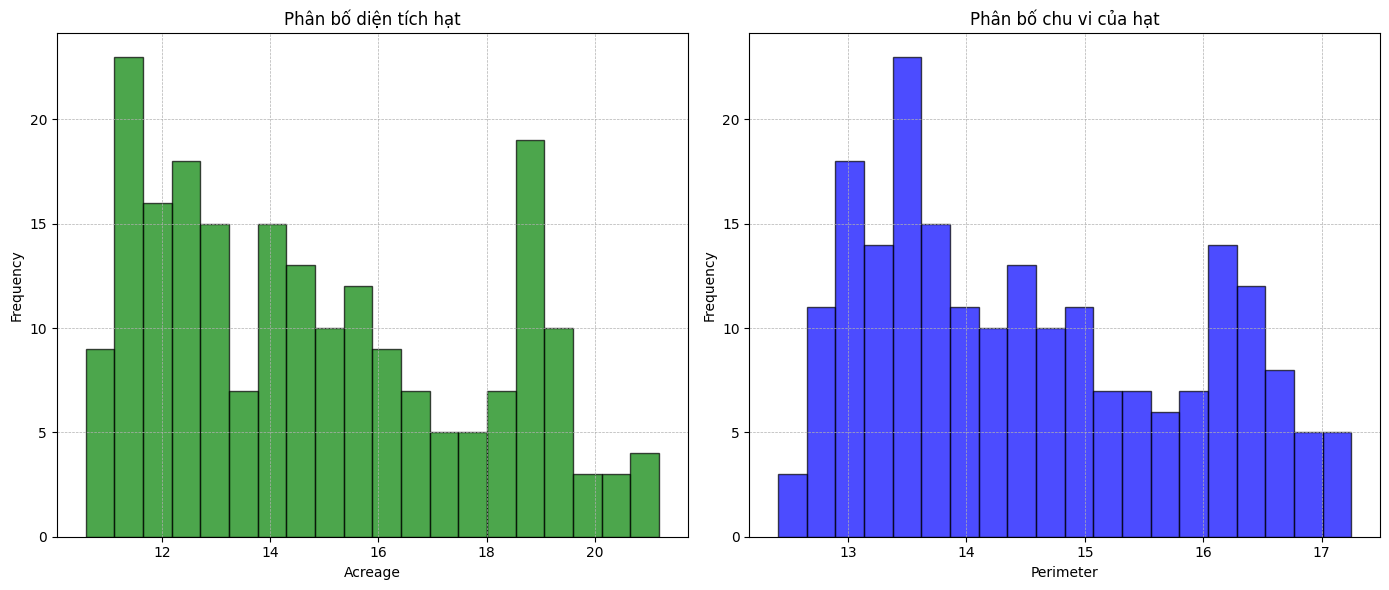

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Vẽ histogram cho 'acreage' trên biểu đồ đầu tiên
axes[0].hist(df['acreage'], bins=20, edgecolor='black', color='green', alpha=0.7)
axes[0].set_title('Phân bố diện tích hạt')
axes[0].set_xlabel('Acreage')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Vẽ histogram cho 'perimeter' trên biểu đồ thứ hai
axes[1].hist(df['perimeter'], bins=20, edgecolor='black', color='blue', alpha=0.7)
axes[1].set_title('Phân bố chu vi của hạt')
axes[1].set_xlabel('Perimeter')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

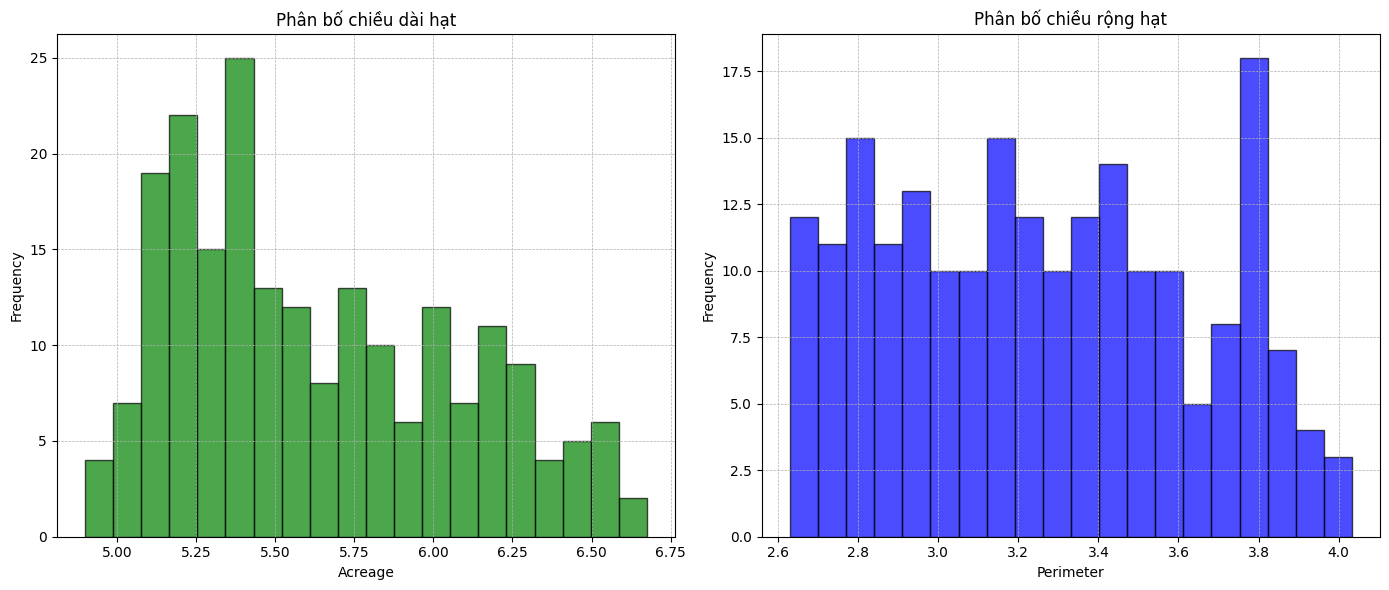

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Vẽ histogram cho 'acreage' trên biểu đồ đầu tiên
axes[0].hist(df['length_of_kernel'], bins=20, edgecolor='black', color='green', alpha=0.7)
axes[0].set_title('Phân bố chiều dài hạt')
axes[0].set_xlabel('Acreage')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Vẽ histogram cho 'perimeter' trên biểu đồ thứ hai
axes[1].hist(df['width_of_kernel'], bins=20, edgecolor='black', color='blue', alpha=0.7)
axes[1].set_title('Phân bố chiều rộng hạt')
axes[1].set_xlabel('Perimeter')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

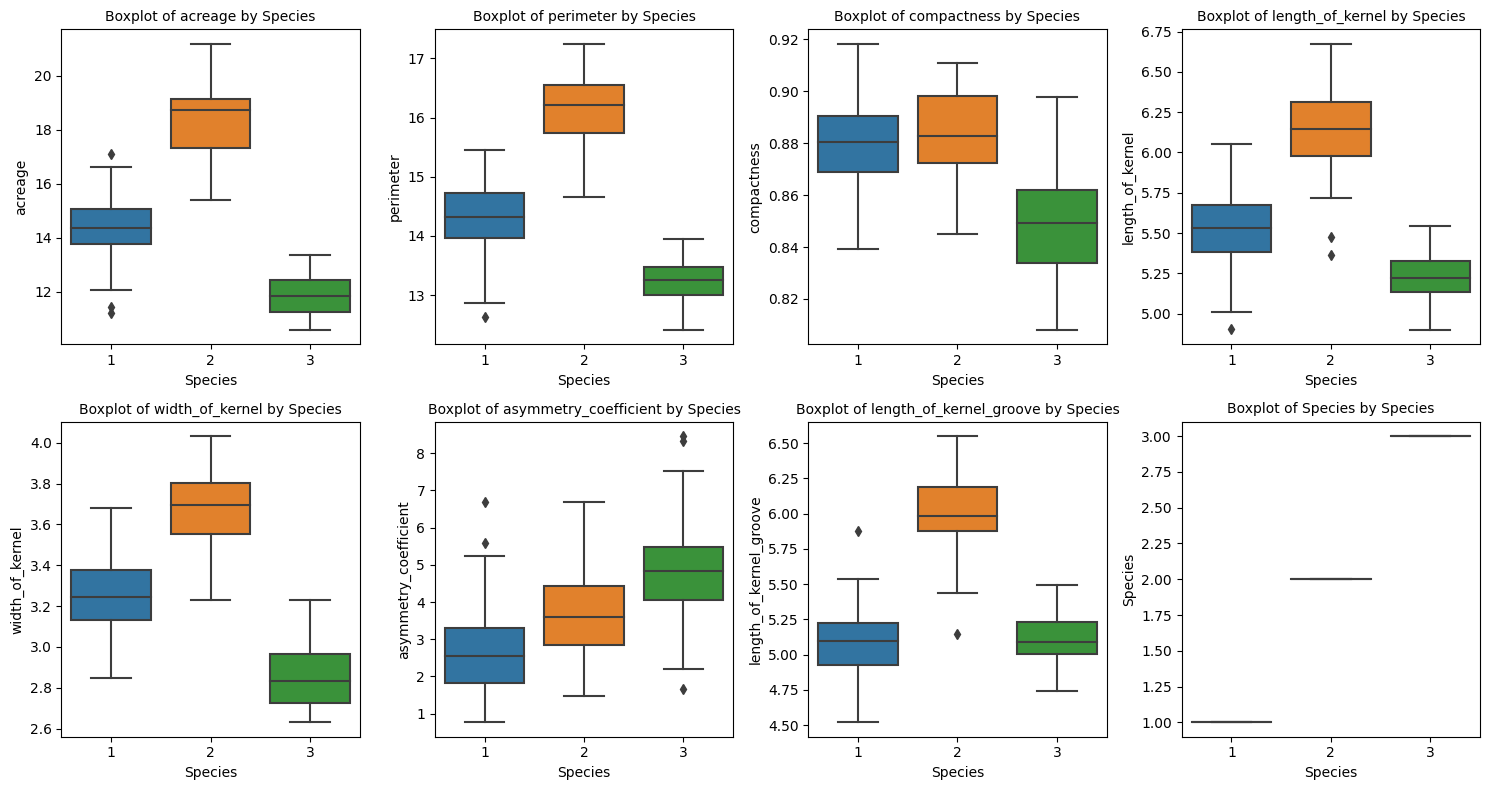

In [ ]:
plt.figure(figsize=(15, 8))

for index, feature in enumerate(seeds_df.columns, 1):
    plt.subplot(2, 4, index)
    sns.boxplot(x='Species', y=feature, data=seeds_df)
    plt.title(f'Boxplot of {feature} by Species', fontsize=10)
plt.tight_layout()
plt.show()


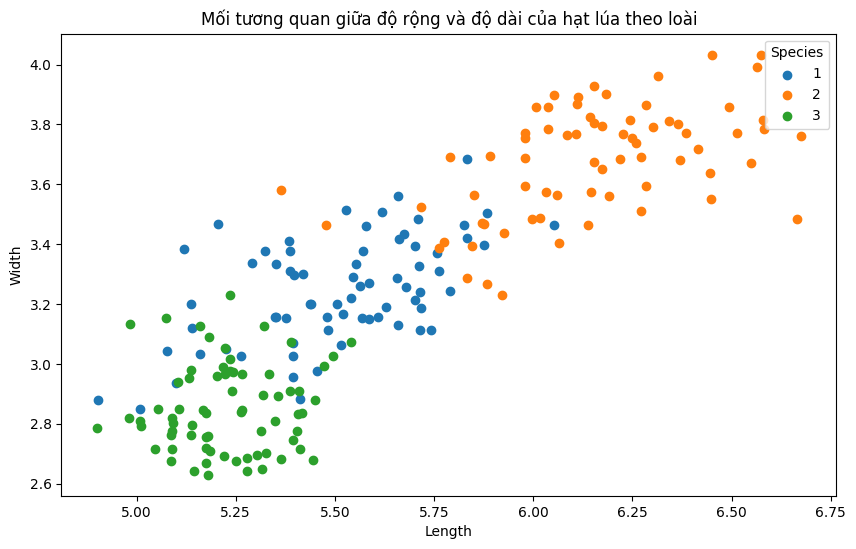

In [ ]:
# Biểu đồ phân tán: Mối tương quan giữa độ rộng và độ dài của hạt lúa
plt.figure(figsize=(10, 6))
for species in seeds_df['Species'].unique():
    subset = seeds_df[seeds_df['Species'] == species]
    plt.scatter(subset['length_of_kernel'], subset['width_of_kernel'], label=species)
plt.title("Mối tương quan giữa độ rộng và độ dài của hạt lúa theo loài")
plt.xlabel("Length")
plt.ylabel("Width")
# Add legend
plt.legend(title="Species")

# Show the plot
plt.show()

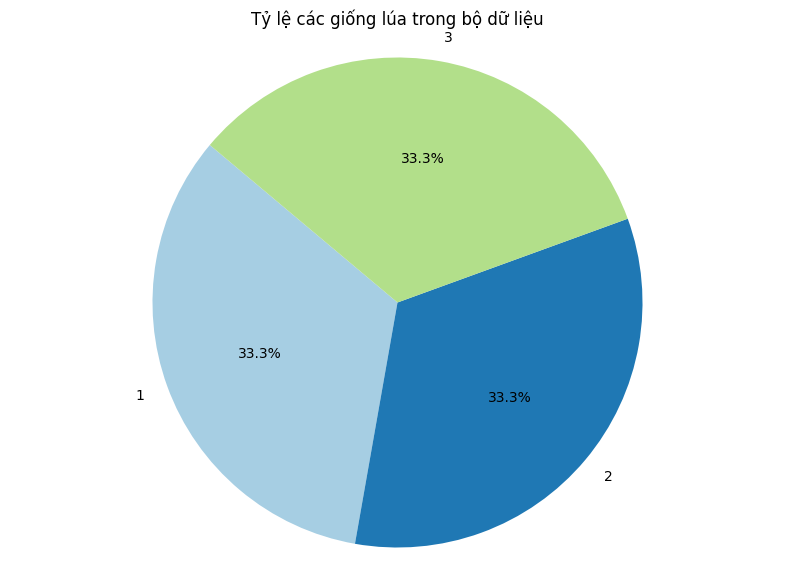

In [ ]:
# Tính tần số cho mỗi loài hạt
species_counts = df['Species'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(10, 7))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Tỷ lệ các giống lúa trong bộ dữ liệu')
plt.axis('equal')  # Đảm bảo biểu đồ tròn có hình dáng đẹp
plt.show()

#### 3.  Cho biết những dữ liệu còn thiếu và đề xuất cách xử lý dữ liệu thiếu đó

In [ ]:
seeds_df.isnull().sum()

acreage                    0
perimeter                  0
compactness                0
length_of_kernel           0
width_of_kernel            0
asymmetry_coefficient      0
length_of_kernel_groove    0
Species                    0
dtype: int64

Bộ dữ liệu không  bị thiếu

#### 4.  Chia bộ dữ liệu thành 2 phần Train/Test với các tỉ lệ nhất định




Chia bộ dữ liệu thành 2 phần Train và Test với tỉ lệ 7/3. <br>
- Train data set = 70%
- Test data set = 30%

In [ ]:
# Chia dữ liệu
df = seeds_df.copy()
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

X_train = df_train.drop('Species', axis=1)
y_train = df_train['Species']

X_test = df_test.drop('Species', axis=1)
y_test = df_test['Species']

In [ ]:
# Ánh xạ lại các giá trị
y_train = y_train - 1
y_test = y_test - 1

#### 5.  Đánh giá bộ dữ liệu với giải thuật KNN bằng phương pháp 10-Fold (k-fold)

In [ ]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

k_values = [1, 3, 5, 7,  8, 10, 13, 15, 18, 20]
results = {}

for k in k_values:
    accuracy_scores = []

    for train_idx, val_idx in k_fold.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_val_fold)

        accuracy = accuracy_score(y_val_fold, y_pred)
        accuracy_scores.append(accuracy)

    results[k] = accuracy_scores

# In kết quả
for k, scores in results.items():
    avg_accuracy = np.mean(scores)
    print(f'K = {k}, Average Accuracy: {avg_accuracy:.4f}')

K = 1, Average Accuracy: 0.8986
K = 3, Average Accuracy: 0.8848
K = 5, Average Accuracy: 0.8990
K = 7, Average Accuracy: 0.9129
K = 8, Average Accuracy: 0.9195
K = 10, Average Accuracy: 0.9195
K = 13, Average Accuracy: 0.9129
K = 15, Average Accuracy: 0.9195
K = 18, Average Accuracy: 0.9262
K = 20, Average Accuracy: 0.9195


**Nhận xét:** <br>
- Mô hình có xu hướng cải thiện khi K tăng lên: Nhìn chung, độ chính xác trung bình tăng lên khi K tăng từ 1 lên 18. Tuy nhiên, khi K tăng lên 20, độ chính xác trở lại mức giống như khi K = 10 và K = 15.
- Kết quả tốt nhất được thu được khi K = 18 với độ chính xác trung bình là 0.9262.
- Chọn K nhỏ hơn nghĩa là có ít hơn các điểm dữ liệu trong quá trình quyết định, điều này có thể làm cho mô hình dễ bị ảnh hưởng bởi nhiễu. Điều này được thể hiện rõ nét ở trường hợp K = 1, nơi độ chính xác không cao nhất.
- K tăng lên, mô hình trở nên ít nhạy cảm hơn với nhiễu, nhưng nếu K quá lớn, mô hình có thể trở nên quá chung chung và không còn phản ánh tính năng cụ thể của từng lớp. Trong trường hợp của bạn, K = 20 cho độ chính xác không cao hơn K = 18, điều này có thể là dấu hiệu rằng K đã quá lớn.Mô hình có xu hướng cải thiện khi K tăng lên: Nhìn chung, độ chính xác trung bình tăng lên khi K tăng từ 1 lên 18. Tuy nhiên, khi K tăng lên 20, độ chính xác trở lại mức giống như khi K = 10 và K = 15.
- Kết quả tốt nhất được thu được khi K = 18 với độ chính xác trung bình là 0.9262.
- Chọn K nhỏ hơn nghĩa là có ít hơn các điểm dữ liệu trong quá trình quyết định, điều này có thể làm cho mô hình dễ bị ảnh hưởng bởi nhiễu. Điều này được thể hiện rõ nét ở trường hợp K = 1, nơi độ chính xác không cao nhất.
- K tăng lên, mô hình trở nên ít nhạy cảm hơn với nhiễu, nhưng nếu K quá lớn, mô hình có thể trở nên quá chung chung và không còn phản ánh tính năng cụ thể của từng lớp. Trong trường hợp của bạn, K = 20 cho độ chính xác không cao hơn K = 18, điều này có thể là dấu hiệu rằng K đã quá lớn.

#### 6.  Huấn luyện dữ liệu cho bài toán phân lớp sử dụng với các giải thuật Decision Tree, Bayes, SVM và XGBoot.

In [ ]:
# Kiểm tra giá trị duy nhất trong y_train và y_test
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

Unique values in y_train: [0 1 2]
Unique values in y_test: [0 1 2]


In [ ]:
# Khởi tạo các mô hình
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(),
}

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # tính độ do accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # tính độ do f1-score
    f1 = f1_score(y_test, y_pred, average='weighted')
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, f1, cm

for model_name, model in models.items():
    accuracy, f1, cm = train_and_evaluate(model, X_train, y_train, X_test, y_test)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print("Confusion Matrix:")
    print(cm)
    print("-" * 30)

Model: Decision Tree
Accuracy: 0.8095238095238095
F1 Score: 0.8116780045351474
Confusion Matrix:
[[15  2  3]
 [ 4 17  0]
 [ 3  0 19]]
------------------------------
Model: Naive Bayes
Accuracy: 0.873015873015873
F1 Score: 0.8733169871381254
Confusion Matrix:
[[16  1  3]
 [ 2 19  0]
 [ 2  0 20]]
------------------------------
Model: SVM
Accuracy: 0.8888888888888888
F1 Score: 0.8897926628573499
Confusion Matrix:
[[17  0  3]
 [ 3 18  0]
 [ 1  0 21]]
------------------------------


Model: XGBoost
Accuracy: 0.9206349206349206
F1 Score: 0.9214092140921409
Confusion Matrix:
[[18  0  2]
 [ 1 20  0]
 [ 2  0 20]]
------------------------------


#### 11. Lưu model với giải thuật đạt kết quả tốt nhất

Model cho kết quả tốt nhất là `SVM` với Accuracy là $0.8889$ và F1 Score là $0.8898$.

In [ ]:
# Lưu model với kết quả tốt nhất
Decision_Tree = models['SVM']
with open('svm.pkl', 'wb') as f:
    pickle.dump(Decision_Tree, f)

#### 12. Xây dựng ứng dụng với đầu vào là 1 dữ liệu hay từ 1 file, in kết quả ra màn hình.

In [ ]:
# Lưu tất cả model để thực hiện tải lên trang web
for model_name, model_obj in models.items():
    filename = model_name.replace(" ", "_") + '.pkl'
    with open(filename, 'wb') as f:
        pickle.dump(model_obj, f)

- Link ứng dụng: 

- Hình ảnh ứng dụng.

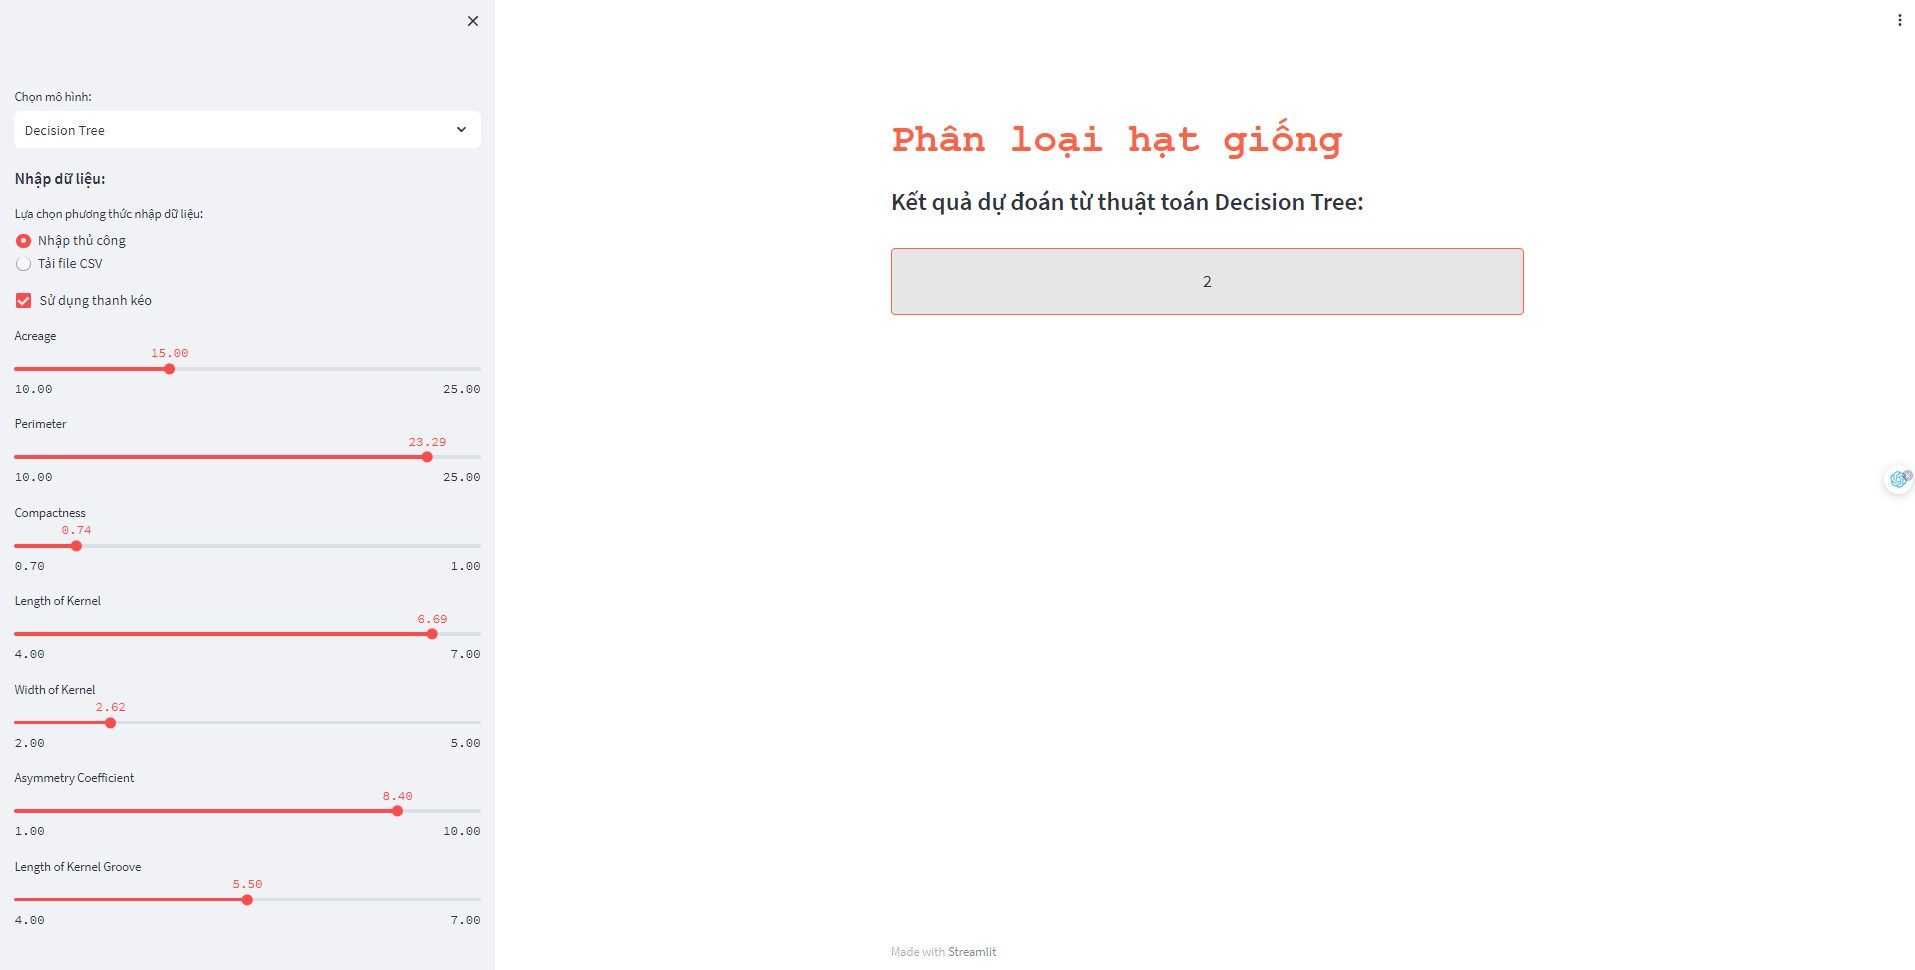